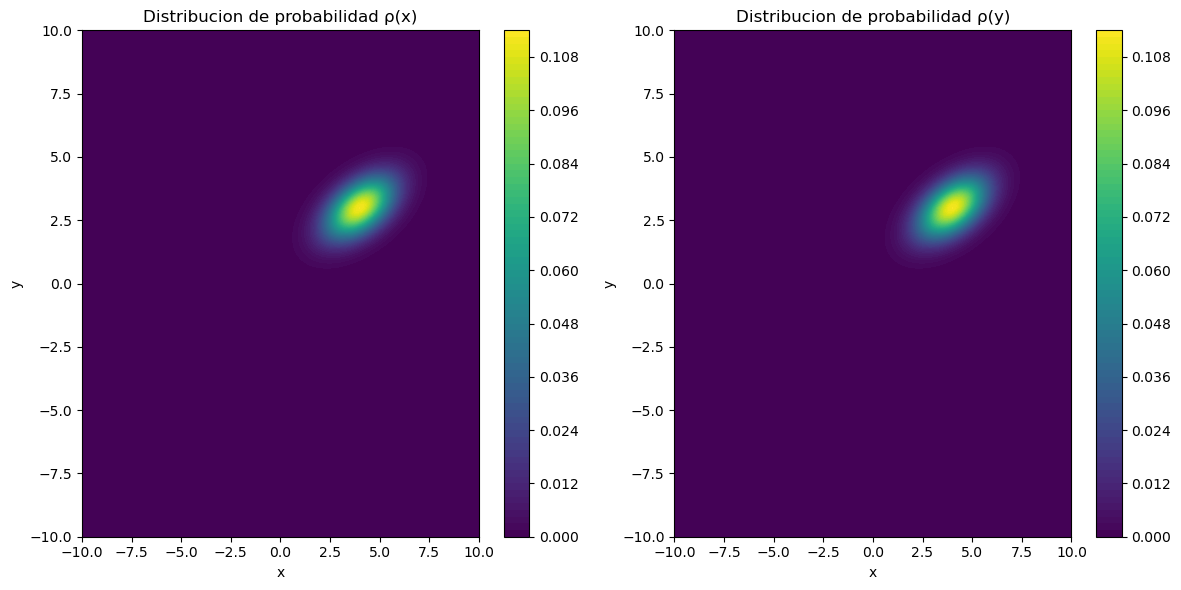

NameError: name 'Z_rho' is not defined

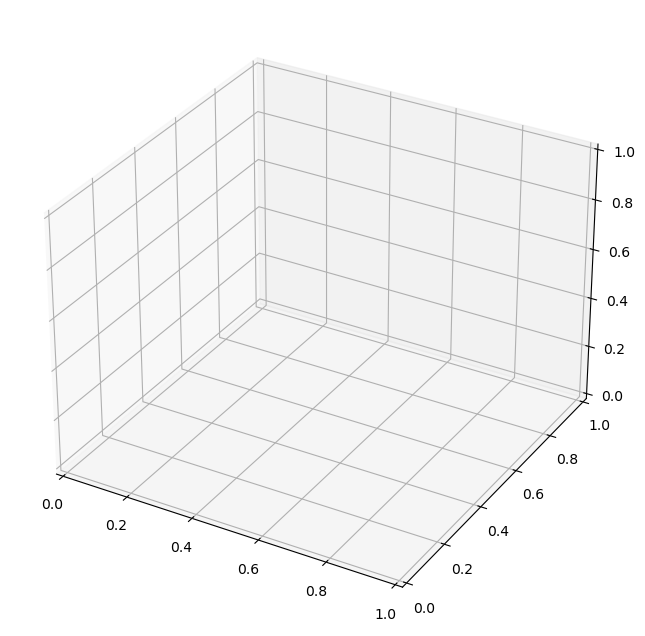

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Definiciones de los valores para el caso en consideración
cxx = 2
cyy = 1
cxy = 1.4
mux = 3
muy = 4

# Definición de la marginalización en y
def rho(x, y):
  '''Funcion que devuelve la marginalización sobre y'''
  return 1 / (2 * np.pi * np.sqrt(2)) * np.exp(
        -0.5 * (2 * (x - mux)**2 - 1.4 * (x - mux) * (y - muy) + (y - muy)**2))

# creación de listas para evaluar y crear las gráficas
x_values = np.linspace(-10, 10, 400)
y_values = np.linspace(-10, 10, 400)
X, Y = np.meshgrid(x_values, y_values)
Z_rho_x = np.zeros(X.shape)
Z_rho_y = np.zeros(X.shape)

# para calcular ρ(x) y ρ(y)
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        Z_rho_x[i, j] = rho(x_values[i], y_values[j])
        Z_rho_y[i, j] = rho(y_values[i], x_values[j])

# configuracion para la visualización de las distribuciones
plt.figure(figsize=(12, 6))

# para graficar ρ(x)
plt.subplot(1, 2, 1)
plt.contourf(X, Y, Z_rho_x, levels=100, cmap='viridis')
plt.colorbar()
plt.title('Distribucion de probabilidad ρ(x)')
plt.xlabel('x')
plt.ylabel('y')

# para gradicar ρ(y)
plt.subplot(1, 2, 2)
plt.contourf(X, Y, Z_rho_y, levels=100, cmap='viridis')
plt.colorbar()
plt.title('Distribucion de probabilidad ρ(y)')
plt.xlabel('x')
plt.ylabel('y')

plt.tight_layout()
plt.show()

# Para la grafica 3d
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# superficie 3d (generacion)
ax.plot_surface(X, Y, Z_rho, cmap='viridis')



# Calificacion: 5.0

El calculo de la marginalizacion consistia en integrar sobre una de las variables. El grafico 3-D deuelve un error asi que no lo puedo ver. Abajo dejo la resolucion

In [70]:
import sympy

x,y,cxx,cyy,cxy,ux,uy = sympy.symbols('x y c_xx c_yy c_xy mu_x mu_y')

gauss_xy = sympy.sqrt(cxx*cyy - cxy**2)/(2*sympy.pi)*sympy.exp(-sympy.Rational(1,2)*cxx*(x-ux)**2 - cxy*(x-ux)*(y-uy)-sympy.Rational(1,2)*cyy*(y-uy)**2)
gauss_xy = gauss_xy.subs({cxx:2,cyy:1,cxy:1.4,ux:3,uy:4})

def marginalizar(int_variable=x):
    I = sympy.integrate(gauss_xy,(int_variable,-np.inf,np.inf))
    return I.simplify()

In [48]:
gauss_x = marginalizar(y)
gauss_y = marginalizar(x)
gauss_x

676.826462526917*sqrt(2)*exp(-0.0200000000000005*x**2 + 0.120000000000003*x - 9)/sqrt(pi)

In [57]:
gauss_y

179.61960636018*sqrt(2)*exp(-0.0100000000000001*y**2 + 0.080000000000001*y - 8)/sqrt(pi)

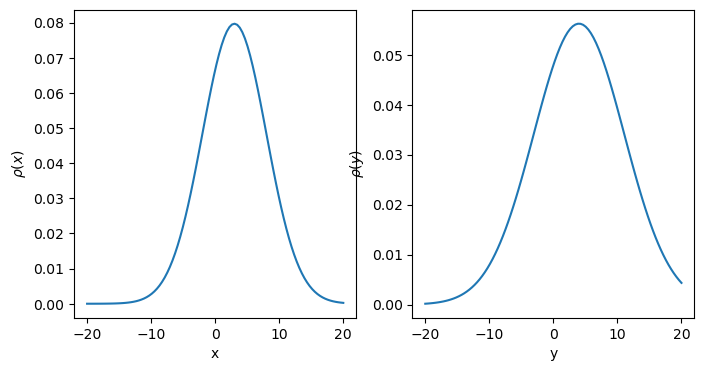

In [68]:
x1 = y1 = np.linspace(-20,20,100)

gauss_x_eval = 676*np.sqrt(2)/np.sqrt(np.pi)*np.exp(-9)*np.exp(0.12*x1 -0.02*x1**2)
gauss_y_eval = 179*np.sqrt(2)/np.sqrt(np.pi)*np.exp(-8)*np.exp(0.08*y1 -0.01*y1**2)

fig,(ax1,ax2) = plt.subplots(1,2,figsize=(8,4))
ax1.set(xlabel='x',ylabel='$\\rho(x)$')
ax2.set(xlabel='y',ylabel='$\\rho(y)$')
ax1.plot(x1,gauss_x_eval)
ax2.plot(y1,gauss_y_eval)

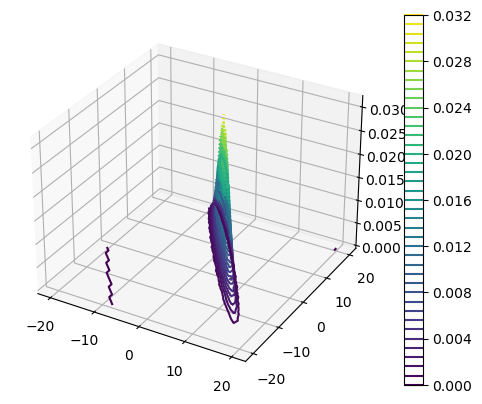

In [84]:
def gauss_xy_func(x,y):
    return 0.070710678118655*np.sqrt(2)*np.exp(-(x - 3)**2 - 1.4*(x - 3)*(y - 4) - (y - 4)**2/2)/np.pi
x1 = y1 = np.linspace(-20,20,40)
x1,y1 = np.meshgrid(x1,y1)
Z = gauss_xy_func(x1,y1)
fig = plt.figure()
ax = plt.axes(projection='3d')

CS = ax.contour3D(x1, y1, Z, 50 )
fig.colorbar(CS)
plt.draw()